In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
    '/home/memari/jhu_centering/tables/calls_cleaned.csv')


In [3]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']


In [4]:
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')


In [5]:
df_group = df_id.merge(df_group, on='survey_id', how='left')


In [6]:
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)


In [7]:
df_plot = df.merge(df_group[['device_id', 'group_x']],
                   on='device_id', how='left')


In [8]:
df_plot = df_plot[['date', 'group_x', 'incoming_time', 'outgoing_time',
                   'missing_time', 'incoming_freq', 'outgoing_freq', 'missing_freq']]


In [9]:
grouped = df_plot.groupby(['group_x'])


In [10]:
df_dict = {group: data for group, data in grouped}


In [11]:
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control = df_dict['Passive Control']


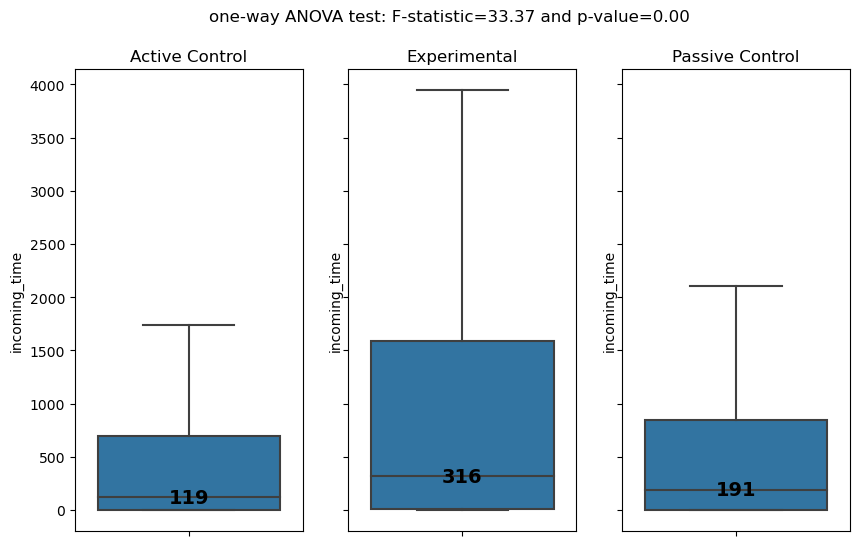

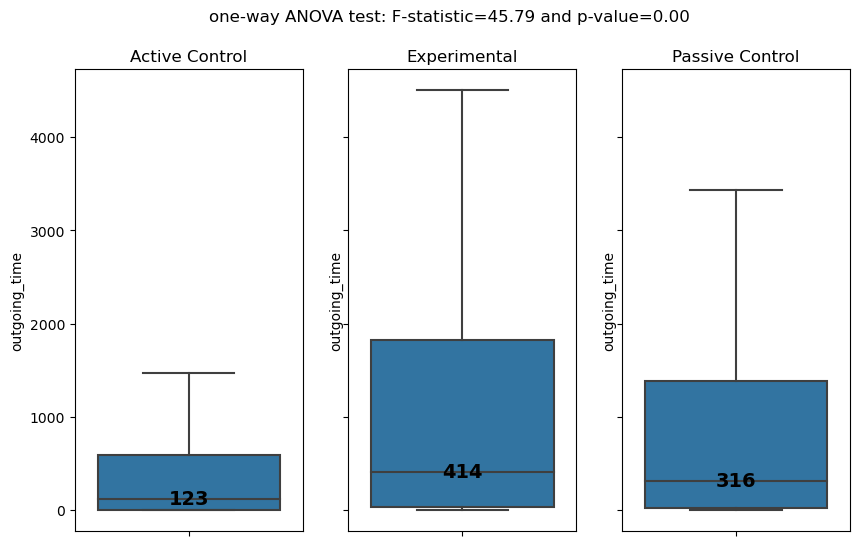

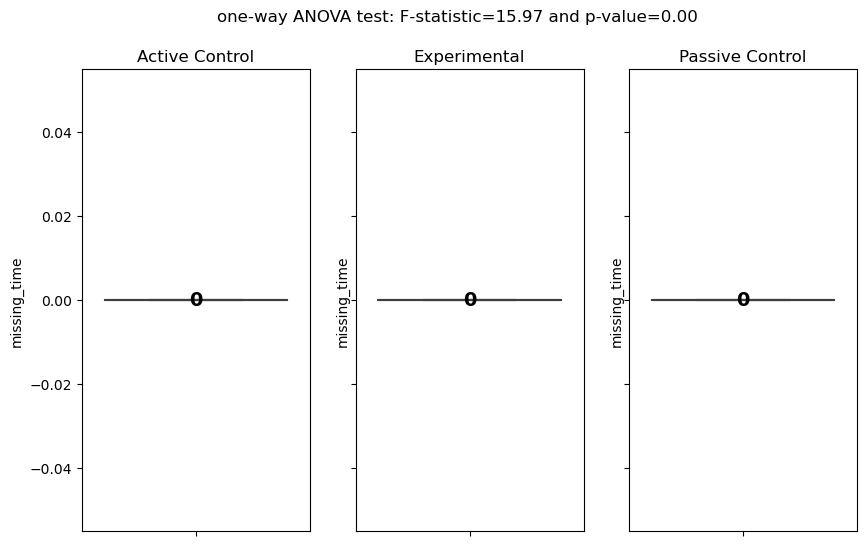

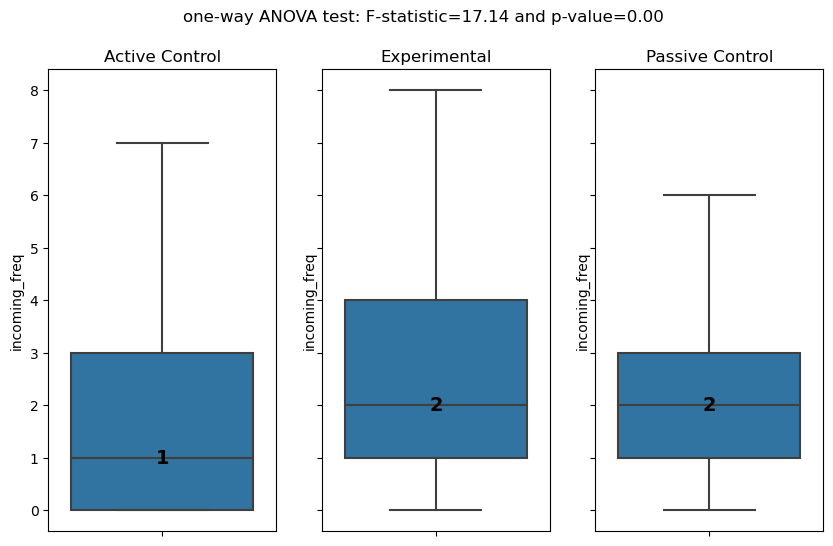

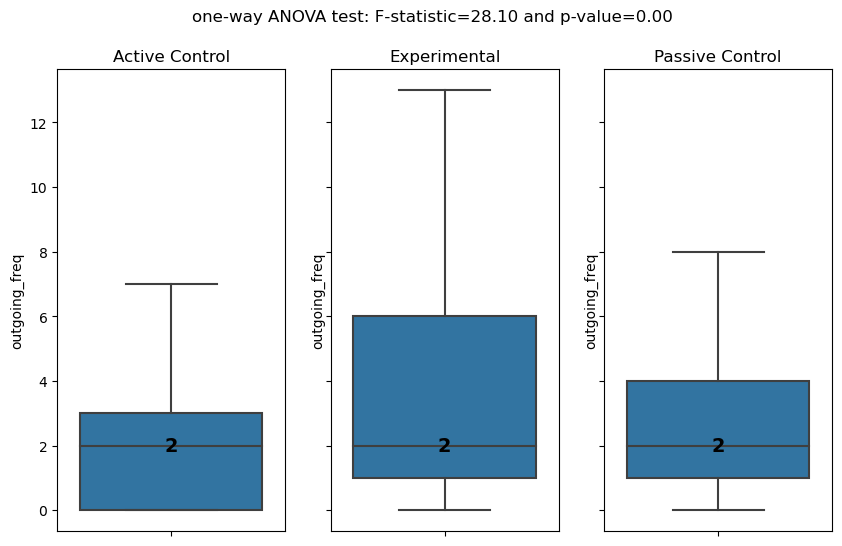

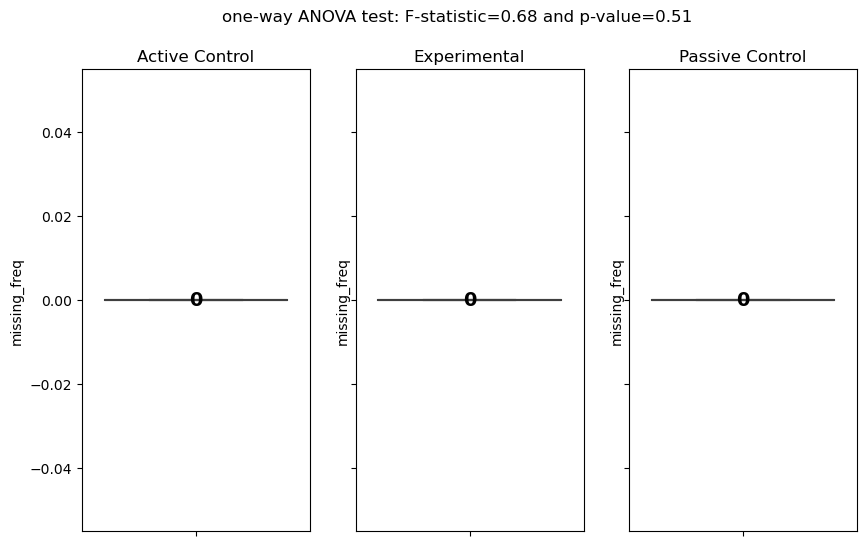

In [14]:
from scipy.stats import stats
clm = 'incoming_time'
mylist = ['incoming_time', 'outgoing_time', 'missing_time',
          'incoming_freq', 'outgoing_freq', 'missing_freq']
for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=experimental_condition[clm],
                orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v", showfliers=False, ax=ax3)

    ax1.set_title("Active Control")
    m1 = int(active_control[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m2 = int(experimental_condition[clm].median())
    ax2.set_title("Experimental")
    ax2.text(0, m2, m2, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m3 = int(passive_control[clm].median())
    ax3.set_title("Passive Control")
    ax3.text(0, m3, m3, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(
        active_control[clm], experimental_condition[clm], passive_control[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()
